In [1]:
import requests
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
from tqdm.autonotebook import tqdm

/var/folders/rh/7rjcc_rs68n6wjb41vhqg3dh0000gn/T/ipykernel_75826/987820437.py:1: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
#get TOP 100 crypto 
url = 'https://coin360.com/coin'
r = requests.get(url)
crypto = pd.read_html(r.text)

crypto = list(crypto[0]['Symbol'])

for i in range(len(crypto)):
    crypto[i] = crypto[i].lower()

In [4]:
#collect data

import cryptocompare as cc
import datetime

def get_minute_data(date=datetime.datetime.now()):
    coins_df = []
    for i in crypto:
        try:
            x = cc.get_historical_price_minute(i, currency='USD', limit=1440, toTs=date)
            x = pd.DataFrame(x).fillna(method='ffill')
            x = x.drop(columns=['conversionSymbol', 'conversionType', 'volumefrom'], errors='ignore')
            x['time'] = pd.to_datetime(x['time'],unit='s')
            x['ticker'] = i
            x = np.array(x)
            coins_df.append(x)
        except:
            pass
    return(np.array(coins_df))
    

In [5]:
minutes = get_minute_data()

[ERROR] CCCAGG market does not exist for this coin pair (ARB-USD)
[ERROR] CCCAGG market does not exist for this coin pair (AGIX-USD)


In [6]:
def cut_df(minutes):
    new_minutes = []
    for i in range(len(minutes)):
        coin = pd.DataFrame(minutes[i])
        coin.set_index([0], inplace=True)
        coin = coin.T[:-1]
        coin = np.array(coin)
        new_minutes.append(coin)
    return(np.array(new_minutes))

minutes = cut_df(minutes)

In [7]:
df = pd.DataFrame()
for i in range(len(minutes)):
    pre = pd.DataFrame(minutes[i]).apply(pd.to_numeric)[:1]
    df = pd.concat([df, pre], ignore_index=True)

In [8]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1431,1432,1433,1434,1435,1436,1437,1438,1439,1440
0,27988.2200,27992.670,27977.040,27959.2800,27951.9500,27952.150,27954.670,27935.3500,27961.170,27945.7000,...,27481.580,27483.380,27471.850,27462.790,27468.420,27468.830,27454.660,27434.900,27413.300,27429.060
1,1774.1200,1774.150,1773.860,1773.0800,1773.2400,1773.360,1773.060,1770.8300,1773.850,1772.8500,...,1747.070,1747.180,1746.490,1746.150,1746.430,1746.320,1745.420,1744.790,1743.500,1743.820
2,1.0010,1.002,1.002,1.0020,1.0020,1.001,1.001,1.0010,1.002,1.0030,...,1.001,1.002,1.002,1.001,1.001,1.001,1.002,1.002,1.001,1.001
3,323.5300,323.610,322.930,323.8300,323.8300,323.690,323.890,322.8400,323.050,322.8700,...,324.400,324.370,324.550,324.010,324.670,323.950,324.010,323.630,323.700,324.000
4,0.9999,1.000,1.000,0.9997,0.9997,1.000,1.000,0.9997,1.000,0.9996,...,1.000,1.001,1.001,1.000,1.000,1.001,1.001,1.001,1.000,1.000


In [9]:
df_clear = np.sqrt(np.sqrt(np.sqrt(df)))

from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
df_norm = pd.DataFrame(min_max_scaler.fit_transform(df_clear))

In [10]:
df_clear.head()

,0,1,2,3,4,5,6,7,8,9,...,1431,1432,1433,1434,1435,1436,1437,1438,1439,1440
0,3.596432,3.596504,3.596253,3.595967,3.595850,3.595853,3.595893,3.595583,3.595998,3.595749,...,3.588229,3.588259,3.588071,3.587923,3.588015,3.588021,3.587790,3.587467,3.587114,3.587372
1,2.547551,2.547556,2.547504,2.547364,2.547393,2.547414,2.547361,2.546960,2.547502,2.547323,...,2.542663,2.542683,2.542557,2.542496,2.542546,2.542526,2.542363,2.542248,2.542013,2.542071
2,1.000125,1.000250,1.000250,1.000250,1.000250,1.000125,1.000125,1.000125,1.000250,1.000375,...,1.000125,1.000250,1.000250,1.000125,1.000125,1.000125,1.000250,1.000250,1.000125,1.000125
3,2.059393,2.059457,2.058916,2.059632,2.059632,2.059521,2.059680,2.058844,2.059011,2.058868,...,2.060085,2.060061,2.060204,2.059775,2.060299,2.059727,2.059775,2.059473,2.059529,2.059767
4,0.999987,1.000000,1.000000,0.999962,0.999962,1.000000,1.000000,0.999962,1.000000,0.999950,...,1.000000,1.000125,1.000125,1.000000,1.000000,1.000125,1.000125,1.000125,1.000000,1.000000


In [11]:
df_norm.head()

,0,1,2,3,4,5,6,7,8,9,...,1431,1432,1433,1434,1435,1436,1437,1438,1439,1440
0,0.999820,0.999846,1.000000,0.999945,0.999946,1.000000,1.000000,1.000000,0.999770,1.000000,...,0.999934,0.999812,0.999814,0.999932,0.999754,0.996541,0.999651,0.999727,0.999734,0.999618
1,0.708227,0.708233,0.708377,0.708356,0.708388,0.708431,0.708408,0.708358,0.708264,0.708426,...,0.708565,0.708479,0.708482,0.708578,0.708448,0.706164,0.708368,0.708454,0.708463,0.694109
2,0.278038,0.278074,0.278137,0.278143,0.278153,0.278133,0.278130,0.278154,0.278092,0.278210,...,0.278705,0.278704,0.278719,0.278729,0.278672,0.277776,0.278695,0.278742,0.278736,0.243446
3,0.572518,0.572539,0.572517,0.572730,0.572750,0.572749,0.572787,0.572604,0.572452,0.572584,...,0.574085,0.574004,0.574074,0.574047,0.574076,0.572071,0.573906,0.573918,0.573994,0.553147
4,0.278000,0.278005,0.278067,0.278064,0.278073,0.278098,0.278095,0.278109,0.278023,0.278092,...,0.278671,0.278669,0.278684,0.278694,0.278637,0.277776,0.278661,0.278707,0.278701,0.243409


In [25]:
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

In [26]:
from sklearn.cluster import KMeans

def kmeans(df, n=10):
    distortions = []
    silhouette = []
    davies_bouldin_list = []
    calinski_harabasz_list = []
    
    labels = []
    
    K = range(2, n)
    for k in tqdm(K):
        kmeans = KMeans(n_clusters=k, random_state=0).fit(df)
        
        distortions.append(kmeans.inertia_)
        silhouette.append(silhouette_score(df, kmeans.labels_))#, metric="euclidean"))
        davies_bouldin_list.append(davies_bouldin_score(df, kmeans.labels_))
        calinski_harabasz_list.append(calinski_harabasz_score(df, kmeans.labels_))
        
        labels.append(len(np.unique(kmeans.labels_)))
    
    plt.figure(figsize=(18, 6))    
    
    ax1 = plt.subplot(1,2,1)
    ax2 = ax1.twinx()
    ax11 = ax1.twinx()
    ax11.plot(K, labels, '--')
    ax1.plot(K, distortions, 'b-')
    ax2.plot(K, silhouette, 'r-')
    ax1.set_xlabel('# clusters')
    ax1.set_ylabel('Distortion', color='b')
    ax2.set_ylabel('Silhouette', color='r')
    
    
    ax3 = plt.subplot(1, 2, 2)
    ax4 = ax3.twinx()
    ax3.plot(K, davies_bouldin_list, 'g-')
    ax4.plot(K, calinski_harabasz_list, 'y-')
    ax3.set_xlabel('# clusters')
    ax3.set_ylabel('Davis B.', color='g')
    ax4.set_ylabel('Calinski H.', color='y')
    
    plt.figure(figsize=(9,6))
    plt.show()

In [27]:
from sklearn.cluster import MiniBatchKMeans

def MBKmeans(df, n=10):
    distortions = []
    silhouette = []
    davies_bouldin_list = []
    calinski_harabasz_list = []
    
    labels = []
    
    K = range(2, n)
    
    for k in tqdm(K):
        kmeans = MiniBatchKMeans(n_clusters=k, random_state=0).fit(df)
        
        distortions.append(kmeans.inertia_)
        silhouette.append(silhouette_score(df, kmeans.labels_))#, metric="euclidean"))
        davies_bouldin_list.append(davies_bouldin_score(df, kmeans.labels_))
        calinski_harabasz_list.append(calinski_harabasz_score(df, kmeans.labels_))
        
        labels.append(len(np.unique(kmeans.labels_)))
    
    plt.figure(figsize=(18, 6))    
    
    ax1 = plt.subplot(1,2,1)
    ax2 = ax1.twinx()
    ax11 = ax1.twinx()
    ax11.plot(K, labels, '--')
    ax1.plot(K, distortions, 'b-')
    ax2.plot(K, silhouette, 'r-')
    ax1.set_xlabel('# clusters')
    ax1.set_ylabel('Distortion', color='b')
    ax2.set_ylabel('Silhouette', color='r')
    
    ax3 = plt.subplot(1, 2, 2)
    ax4 = ax3.twinx()
    ax3.plot(K, davies_bouldin_list, 'g-')
    ax4.plot(K, calinski_harabasz_list, 'y-')
    ax3.set_xlabel('# clusters')
    ax3.set_ylabel('Davis B.', color='g')
    ax4.set_ylabel('Calinski H.', color='y')
    
    plt.figure(figsize=(9,6))
    plt.show()



In [28]:
from sklearn.cluster import SpectralClustering

def Spectralc(df, n=10):
    distortions = []
    silhouette = []
    davies_bouldin_list = []
    calinski_harabasz_list = []
    
    labels = []
    
    K = range(2, n)
    
    for k in tqdm(K):
        kmeans = SpectralClustering(n_clusters=k, random_state=0, assign_labels='discretize').fit(df)
        
        distortions.append(np.nan)
        silhouette.append(silhouette_score(df, kmeans.labels_))#, metric="euclidean"))
        davies_bouldin_list.append(davies_bouldin_score(df, kmeans.labels_))
        calinski_harabasz_list.append(calinski_harabasz_score(df, kmeans.labels_))
        
        labels.append(len(np.unique(kmeans.labels_)))
    
    plt.figure(figsize=(18, 6))    
    
    ax1 = plt.subplot(1,2,1)
    ax2 = ax1.twinx()
    ax11 = ax1.twinx()
    ax11.plot(K, labels, '--')
    ax1.plot(K, distortions, 'b-')
    ax2.plot(K, silhouette, 'r-')
    ax1.set_xlabel('# clusters')
    ax1.set_ylabel('Distortion', color='b')
    ax2.set_ylabel('Silhouette', color='r')
    
    ax3 = plt.subplot(1, 2, 2)
    ax4 = ax3.twinx()
    ax3.plot(K, davies_bouldin_list, 'g-')
    ax4.plot(K, calinski_harabasz_list, 'y-')
    ax3.set_xlabel('# clusters')
    ax3.set_ylabel('Davis B.', color='g')
    ax4.set_ylabel('Calinski H.', color='y')
    
    plt.figure(figsize=(9,6))
    plt.show()




In [34]:
from sklearn.cluster import DBSCAN

def DBS(df, n=10):
    distortions = []
    silhouette = []
    davies_bouldin_list = []
    calinski_harabasz_list = []
    
    labels = []
    
    K = np.linspace(0.1, 6.0, num=n)
    
    for k in tqdm(K):
        kmeans = DBSCAN(eps=k, min_samples=5).fit(df)
        
        distortions.append(np.nan)
        silhouette.append(np.nan)#silhouette_score(df, kmeans.labels_))#, metric="euclidean"))
        davies_bouldin_list.append(np.nan)#davies_bouldin_score(df, kmeans.labels_))
        calinski_harabasz_list.append(np.nan)#calinski_harabasz_score(df, kmeans.labels_))
        
        labels.append(len(np.unique(kmeans.labels_)))
    
    plt.figure(figsize=(18, 6))    
    
    ax1 = plt.subplot(1,2,1)
    ax2 = ax1.twinx()
    ax1.plot(K, distortions, 'b-')
    ax2.plot(K, silhouette, 'r-')
    ax1.set_xlabel('EPS')
    ax1.set_ylabel('Distortion', color='b')
    ax2.set_ylabel('Silhouette', color='r')
    
    ax3 = plt.subplot(1, 2, 2)
    ax4 = ax3.twinx()
    ax11 = ax1.twinx()
    ax11.plot(K, labels, '--')
    ax3.plot(K, davies_bouldin_list, 'g-')
    ax4.plot(K, calinski_harabasz_list, 'y-')
    ax3.set_xlabel('EPS')
    ax3.set_ylabel('Davis B.', color='g')
    ax4.set_ylabel('Calinski H.', color='y')
    
    plt.figure(figsize=(9,6))
    plt.show()
    return(kmeans.labels_)

  0%|          | 0/28 [00:00<?, ?it/s]

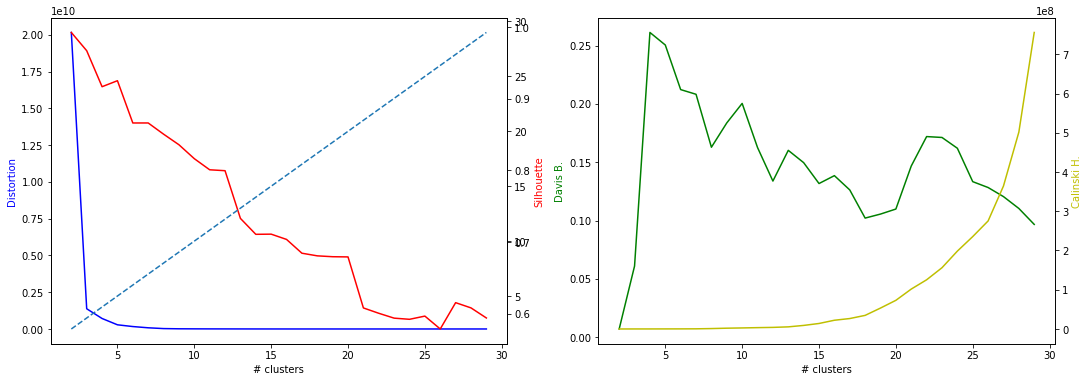

<Figure size 648x432 with 0 Axes>

  0%|          | 0/28 [00:00<?, ?it/s]

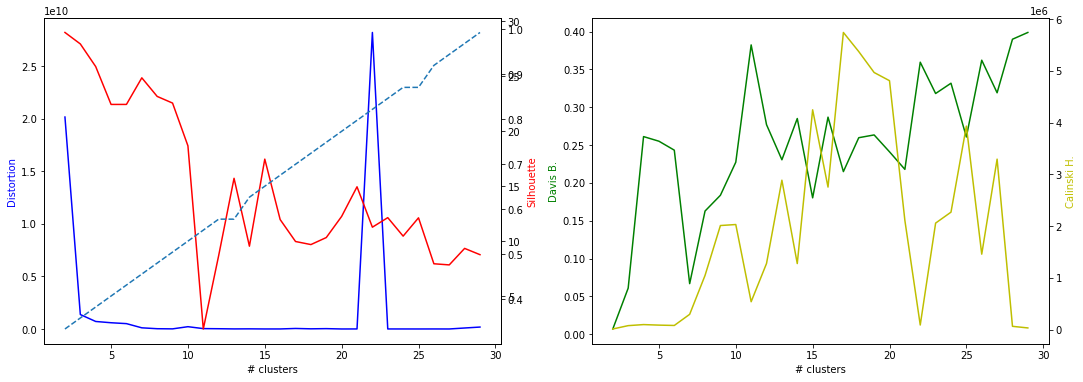

<Figure size 648x432 with 0 Axes>

  0%|          | 0/30 [00:00<?, ?it/s]

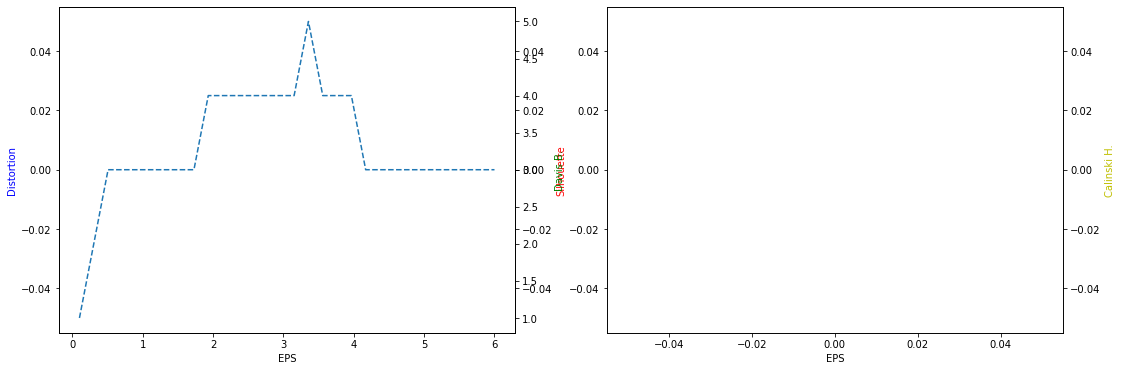

<Figure size 648x432 with 0 Axes>

(None,
 None,
 array([-1, -1,  0, -1,  0,  1,  1, -1,  1,  0, -1,  0, -1, -1,  1,  1, -1,
         0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,  0,  1, -1,
         1, -1,  1, -1,  1, -1, -1,  0,  1,  0,  1, -1,  1,  1, -1,  0,  0,
        -1,  0,  0, -1,  1,  0,  0,  1, -1, -1,  1, -1,  1,  0, -1,  1, -1,
         0, -1,  0,  1, -1, -1, -1,  0, -1, -1,  1, -1,  1, -1, -1,  1, -1,
         0,  1, -1,  0,  1,  1,  0,  0,  1,  1, -1,  1,  0]))

In [36]:
kmeans(df, 30), MBKmeans(df, 30), DBS(df, 30)

  0%|          | 0/28 [00:00<?, ?it/s]

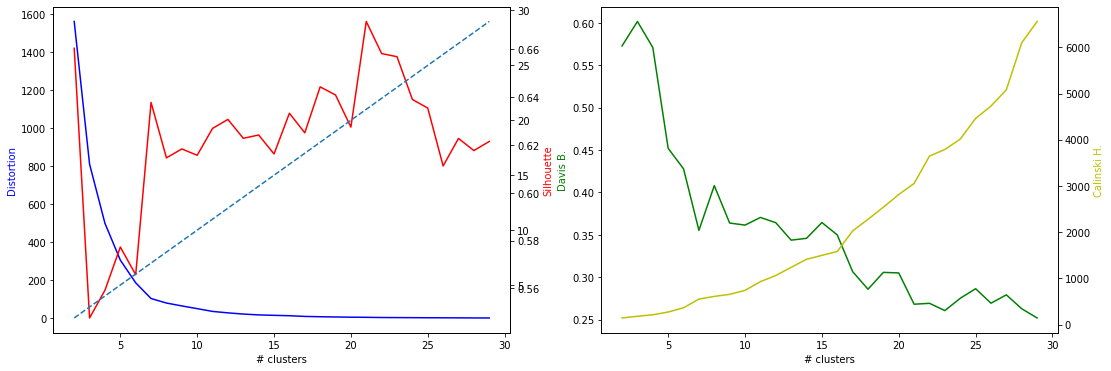

<Figure size 648x432 with 0 Axes>

  0%|          | 0/28 [00:00<?, ?it/s]

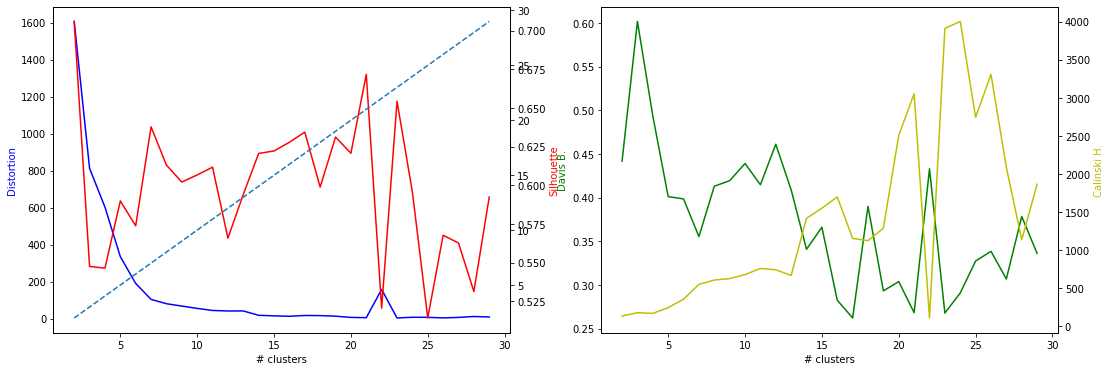

<Figure size 648x432 with 0 Axes>

  0%|          | 0/1000 [00:00<?, ?it/s]

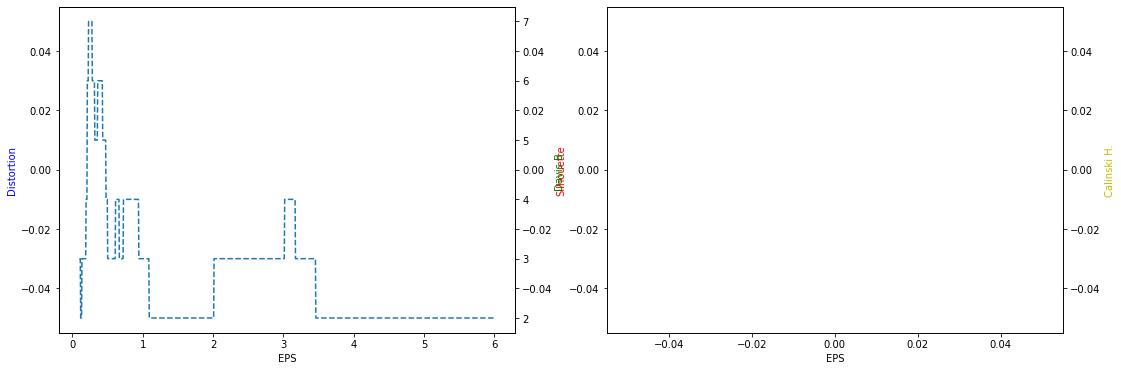

<Figure size 648x432 with 0 Axes>

(None,
 None,
 array([-1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]))

In [37]:
kmeans(df_norm, 30), MBKmeans(df_norm, 30), DBS(df_norm, 1000)

In [38]:
kmeans = KMeans(n_clusters=26, random_state=0).fit(df_norm)
labls = kmeans.labels_

In [39]:
kmeans

KMeans(n_clusters=26, random_state=0)

In [40]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(df_norm)

In [41]:
principalComponents = pd.DataFrame(principalComponents, columns = 
                    ['principal component 1_el', 'principal component 2_el', 'principal component 3_el'])
principalComponents['cluster'] = labls
principalComponents.head()

,principal component 1_el,principal component 2_el,principal component 3_el,cluster
0,25.339030,-0.038101,0.072826,2
1,14.275000,-0.041404,0.036604,7
2,-2.045130,-0.042326,-0.016835,0
3,9.146059,-0.045617,0.020513,13
4,-2.046934,-0.042353,-0.016827,0


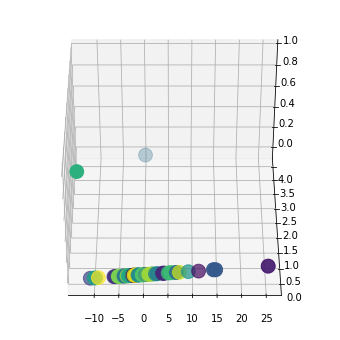

In [42]:
fig = plt.figure(figsize=(26,6))
ax = fig.add_subplot(131, projection='3d')

#elements
ax.scatter(principalComponents['principal component 1_el'], 
           principalComponents['principal component 2_el'], 
           principalComponents['principal component 3_el'], 
           c=principalComponents['cluster'],
           s=190)

ax.view_init(40, -90)


In [43]:
print(kmeans.inertia_)
print(silhouette_score(df_norm, kmeans.labels_))
print(davies_bouldin_score(df_norm, kmeans.labels_))
print(calinski_harabasz_score(df_norm, kmeans.labels_))

2.36085765275044
0.611222097860499
0.269370577816984
4729.415079823779


In [226]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

class Feed:
    def __init__(self, max_len=1000000):
        # self.open = []
        # self.volume = []
        self.close = []
        self.max_len = max_len

    def append_item(self, item):
        # self.open.append(item['Open'])
        # self.volume.append(item['Volume'])
        self.close.append(item['Close'])

        if len(self.close) > self.max_len:
            # self.open = self.open[-max_len // 2:]
            self.close = self.close[-self.max_len // 2:]
            # self.volume = self.open[-max_len // 2:]

    def __len__(self):
        return len(self.close)


class IStrategy:
    def make_decision(self, feeds):
        raise NotImplementedError

    def prepare(self, feeds):
        cur_feeds = {key: Feed() for key in feeds}
        feed_len = len(next(iter(feeds.values())))
        for i in range(feed_len):
            for symbol in feeds:
                cur_feeds[symbol].append_item({'Close': feeds[symbol].close[i]})
            self.make_decision(cur_feeds)

    def get_plot_lines(self):
        return dict()

    def get_plot_points(self):
        return []

    def get_name(self):
        return 'Strategy'


class PlotPoint:
    def __init__(self, tick, value, name):
        self.tick = tick
        self.value = value
        self.name = name


class Position:
    def __init__(self, price, amount, direction, symbol):
        self.price = price
        self.amount = amount
        assert direction == 'long' or direction == 'short'
        self.direction = direction
        self.symbol = symbol


class Backtest():
    def __init__(self, feed_dfs, strategy, comission=0.0004):
        self.feed_dfs = feed_dfs
        self.strategy = strategy
        self.comission = comission

    def _plot_strategy(self):
        lines_list = self.strategy.get_plot_lines()
        points_list = self.strategy.get_plot_points()

        for lines, points in zip(lines_list, points_list):
            plt.figure(figsize=(20, 10))
            for line_name, line in lines.items():
                plt.plot(line, label=line_name)

            point_names = set(point.name for point in points)
            for point_name in point_names:
                plt.scatter(
                    [point.tick for point in points if point.name == point_name],
                    [point.value for point in points if point.name == point_name],
                    label=point_name
                )

            plt.legend()

    def _compute_daily_profit(self, strategy_positions, feeds):
        daily_profit = []
        cur_positions = []
        num_ticks = len(next(iter(feeds.values())).close)
        for tick in range(num_ticks):
            daily_profit.append(0)
            for position in cur_positions:
                if position.direction == 'long':
                    daily_profit[-1] += \
                        position.amount * (feeds[position.symbol].close[tick] - position.price)
                elif position.direction == 'short':
                    daily_profit[-1] += \
                        position.amount * (position.price - feeds[position.symbol].close[tick])

            if tick == 0:
                daily_profit[-1] -= \
                    sum(self.comission * feeds[s].close[tick] * abs(a) for s, a in strategy_positions[tick])
            elif strategy_positions[tick] != strategy_positions[tick - 1]:
                daily_profit[-1] -= \
                    sum(self.comission * feeds[s].close[tick] * abs(a) for s, a in strategy_positions[tick].items()) + \
                    sum(self.comission * feeds[s].close[tick] * abs(a) for s, a in strategy_positions[tick - 1].items())

            cur_positions = []
            for symbol, amount in strategy_positions[tick].items():
                cur_positions.append(Position(
                    price=feeds[symbol].close[tick],
                    amount=abs(amount),
                    direction='long' if amount > 0 else 'short',
                    symbol=symbol
                ))

        return daily_profit

    def _compute_num_trades(self, positions):
        num_trades = 0
        for i in range(len(positions) - 1):
            if positions[i] != positions[i + 1]:
                num_trades += 1
        return num_trades

    def _compute_sortino(self, daily_profit, strategy_positions, cur_feeds):
        max_position = 0
        risk_free_rate = 0.05
        for i in range(len(strategy_positions)):
            cur_position = sum(abs(quantity) * cur_feeds[instrument].close[i] for instrument, quantity in strategy_positions[i].items())
            max_position = max(cur_position, max_position)
        daily_profit = np.array(daily_profit)
        daily_profit = daily_profit / max_position
        vol = daily_profit[daily_profit < 0].std()
        sortino_ratio = (daily_profit.mean() - risk_free_rate / (365 * 60 * 24)) / vol
        return sortino_ratio

    def _compute_return(self, daily_profit, strategy_positions, cur_feeds):
        max_position = 0
        for i in range(len(strategy_positions)):
            cur_position = sum(abs(quantity) * cur_feeds[instrument].close[i] for instrument, quantity in strategy_positions[i].items())
            max_position = max(cur_position, max_position)
        if max_position == 0:
            return 0
        return sum(daily_profit)/max_position * 100

    def _compute_metrics(self, daily_profit, strategy_positions, cur_feeds):        
        return {'total_profit': sum(daily_profit)
                , 'num_trades': self._compute_num_trades(strategy_positions)
                , 'sortino_ratio':self._compute_sortino(daily_profit, strategy_positions, cur_feeds)
                , 'return, %':self._compute_return(daily_profit, strategy_positions, cur_feeds)}

    def _plot_metrics(self, daily_profit):
        profit = [0]
        for x in daily_profit:
            profit.append(profit[-1] + x)
                
        plt.figure(figsize=(20, 10))
        plt.plot(profit, label='profit')
        plt.legend() 

    def run(self, plot=False, num_ticks=None):
        if num_ticks is None:
            num_ticks = min(df.shape[0] for df in self.feed_dfs.values())
        cur_feeds = {symbol: Feed() for symbol in self.feed_dfs}
        strategy_positions = []
    
        for tick in tqdm(range(num_ticks)):
            for symbol in self.feed_dfs:
                cur_feeds[symbol].append_item(self.feed_dfs[symbol].iloc[tick])  
            
            position = self.strategy.make_decision(cur_feeds)
            strategy_positions.append(position)

        daily_profit = self._compute_daily_profit(strategy_positions, cur_feeds)
        
        if plot:
            self._plot_metrics(daily_profit)
#             self._plot_strategy()
        
        return self._compute_metrics(daily_profit, strategy_positions, cur_feeds), strategy_positions


In [227]:
class Cluster_Pair_Stratagy(IStrategy):
    
    def __init__(self, total_invest_val, cluster_labels, log_flag):
        
        # Принимает общую величину инвестиций, лейблы кластеров тикеров, флаг способа рассчета доходностей. 
        # Лейблы кластеров должны идти в том же порядке, что и тикеры в feeds в функции 
        # make_desicion.
        
        self.total_invest_val = total_invest_val
        self.cluster_labels = cluster_labels
        self.cluster_names = list(set(cluster_labels['label']))
        self.one_cluster_investment = self.total_invest_val/len(self.cluster_names)
        self.log_flag = log_flag
    
    def get_columns_data_1_data_2(self, cluster_df, shift):
        # функция выделения названия колонок для data_2 и data_1.
        # Принимает: датафрейм со значениями цен активов в кластере, величину сдвига.
        # Возвращает: названия колонок, соответствующих data_1 и data_2.
        # Т.к. объект feeds (из которого формируется cluster_df) не хранит дат,
        # возвращаются номера колонок. 
        
        date_2 = list(cluster_df.columns)[-1]
        date_1 = list(cluster_df.columns)[-1*(shift+1)]
        return date_1, date_2
        
    def make_decision_one_cluster(self, cluster_number, feeds, shift, log_returns):
        # функция принятия решения по отдельному кластеру. 
        # Принимает номер кластераб словарь объектов класса feed, где ключи - название активов, 
        # значения - объекты класса feed, соответствующие тикеру, величину сдвига между data_1 и data_2.
        # Флаг log_returns определяет, какие доходности считаем. 
        # Класс feed определяется в core.py
        # Возвращает: словарь, где ключи -названия активов, значения - величины позиции по активу в кластере.
        
        
        # заглушка-проверка: берем первый тикер, если данных в нем недостаточно (меньше, 
        # чем расстояние между date_1 и date_2) - возвращаем пустой результат
        trial_ticker = list(feeds.keys())[0]
        if len(feeds[trial_ticker].close) < shift+1:
            return {}
        
        # выбираем тикеры и feeds, относящиеся к кластеру
        cluster_tickers = list(self.cluster_labels[self.cluster_labels['label'] == cluster_number].index)
        cluster_feeds = {i : feeds[i] for i in cluster_tickers}
        
        # преобразуем feeds в датафрейм
        cluster_df = pd.DataFrame()

        for i in cluster_tickers: 
            cluster_df[i] = cluster_feeds[i].close

        cluster_df = cluster_df.T
        
        # получаем даты, по которым считаем доходность
        date_1, date_2 = self.get_columns_data_1_data_2(cluster_df, shift)
        cluster_df = cluster_df[[date_1,date_2]]
        
        # cчитаем различные R
        if log_returns == True:
            cluster_df['R'] = np.log(cluster_df[date_2]/cluster_df[date_1])
        else:
            cluster_df['R'] = cluster_df[date_2]/cluster_df[date_1] - 1

        mean_R = np.mean(cluster_df['R'])
        cluster_df['R_tild'] = cluster_df['R'] - mean_R
        
        if np.sum(np.abs(cluster_df['R_tild'])) == 0:
            return {}
        
        # определяем веса, долларовый размер позиции D и количество активов в позиции Q. 
        gamma = self.one_cluster_investment/np.sum(np.abs(cluster_df['R_tild']))
        cluster_df['D'] = -1*gamma*cluster_df['R_tild']
        cluster_df['Q'] = cluster_df['D']/cluster_df[date_2]

        return dict(cluster_df['Q'])
        
    def make_decision(self, feeds):
        # функция принятия решения. Принимает словарь объектов feed, где ключи - название активов, 
        # значения - объекты класса feed, соответствующие тикеру. Класс feed определяется в core.py.
        # Возвращает: словарь, где ключи -названия активов, значения - величины позиции по активу. 
        
        results = {}
        shift = 2
        for i in self.cluster_names:
            positions = self.make_decision_one_cluster(i, feeds, shift, self.log_flag)
            results.update(positions)
        
        return results
    
    
    def get_plot_lines(self):
        # не написано, т.к. неясно, что строить
        return 0
    def get_plot_points(self):
        # не написано, т.к. неясно, что строить
        return 0
    
    
    
    def get_name(self):
        # ответ-заглушка
        return 'Strategy-Smile'

In [177]:
cluster_labels = kmeans.labels_

In [178]:
params = { 
    'total_invest_val':10000, 
    'cluster_labels': cluster_labels,
    'log_flag' : False
}

In [48]:
minutes = get_minute_data()

[ERROR] CCCAGG market does not exist for this coin pair (ARB-USD)
[ERROR] CCCAGG market does not exist for this coin pair (AGIX-USD)


In [49]:
def cut_df_two(minutes):
    gg = pd.DataFrame()
    for i in range(len(minutes)):
        minutes1 = pd.DataFrame(minutes[i]).T
        minutes1.columns = minutes1.iloc[0]
        minutes1 = minutes1[1:2]
        gg = pd.concat([gg, minutes1], ignore_index=True)
    return(gg)

def normalisation_df(df):
    df_clear = np.sqrt(np.sqrt(np.sqrt(df.apply(pd.to_numeric))))
    min_max_scaler = preprocessing.MinMaxScaler()
    df_norm = pd.DataFrame(min_max_scaler.fit_transform(df_clear))
    return(df_norm)


[ERROR] CCCAGG market does not exist for this coin pair (ARB-USD)
[ERROR] CCCAGG market does not exist for this coin pair (AGIX-USD)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp']. An error will be raised in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp']. An error will be raised in 1.2.
  warnings.warn(


In [232]:
ddf = cut_df_two(minutes)

In [233]:
ddf

,2023-03-24 13:08:00,2023-03-24 13:09:00,2023-03-24 13:10:00,2023-03-24 13:11:00,2023-03-24 13:12:00,2023-03-24 13:13:00,2023-03-24 13:14:00,2023-03-24 13:15:00,2023-03-24 13:16:00,2023-03-24 13:17:00,...,2023-03-25 12:59:00,2023-03-25 13:00:00,2023-03-25 13:01:00,2023-03-25 13:02:00,2023-03-25 13:03:00,2023-03-25 13:04:00,2023-03-25 13:05:00,2023-03-25 13:06:00,2023-03-25 13:07:00,2023-03-25 13:08:00
0,27988.22,27992.67,27977.04,27959.28,27951.95,27952.15,27954.67,27935.35,27961.17,27945.7,...,27481.58,27483.38,27471.85,27462.79,27468.42,27468.83,27454.66,27434.9,27413.3,27430.7
1,1774.12,1774.15,1773.86,1773.08,1773.24,1773.36,1773.06,1770.83,1773.85,1772.85,...,1747.07,1747.18,1746.49,1746.15,1746.43,1746.32,1745.42,1744.79,1743.5,1744.81
2,1.001,1.002,1.002,1.002,1.002,1.001,1.001,1.001,1.002,1.003,...,1.001,1.002,1.002,1.001,1.001,1.001,1.002,1.002,1.001,1.001
3,323.53,323.61,322.93,323.83,323.83,323.69,323.89,322.84,323.05,322.87,...,324.4,324.37,324.55,324.01,324.67,323.95,324.01,323.63,323.7,323.88
4,0.9999,1.0,1.0,0.9997,0.9997,1.0,1.0,0.9997,1.0,0.9996,...,1.0,1.001,1.001,1.0,1.0,1.001,1.001,1.001,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,0.02771,0.0277,0.02768,0.02771,0.02772,0.02771,0.02766,0.02767,0.02767,0.02763,...,0.02701,0.02691,0.0269,0.02691,0.02691,0.0269,0.02689,0.02702,0.02686,0.0269
94,0.03311,0.03311,0.03311,0.03311,0.03303,0.03302,0.03302,0.03302,0.03302,0.033,...,0.03497,0.03497,0.03497,0.03497,0.03497,0.03497,0.03501,0.03501,0.03501,0.03501
95,6.024,6.011,6.028,6.028,6.022,6.014,6.005,6.003,6.003,6.003,...,5.541,5.531,5.521,5.519,5.543,5.519,5.492,5.492,5.492,5.51
96,0.507,0.506,0.5063,0.5088,0.5098,0.5065,0.5089,0.5089,0.5081,0.5089,...,0.502,0.502,0.502,0.502,0.5049,0.502,0.502,0.501,0.501,0.501


In [234]:
ddf.columns = pd.date_range(start='2023-03-24 01:00:00', periods=1441, freq=None)

In [206]:
ddf['ticker'] = crypto[:-2]
ddf['label'] = kmeans.labels_

In [207]:
tick = list(np.arange(0,len(ddf['ticker'])))
labl = ddf['label']

In [210]:
train_df = ddf.T[:1000].T
train_df['ticker'] = tick
train_df['label'] = labl
train_df['good_cluster'] = 1
train_df.head()

,2023-03-24 01:00:00,2023-03-25 01:00:00,2023-03-26 01:00:00,2023-03-27 01:00:00,2023-03-28 01:00:00,2023-03-29 01:00:00,2023-03-30 01:00:00,2023-03-31 01:00:00,2023-04-01 01:00:00,2023-04-02 01:00:00,...,2025-12-11 01:00:00,2025-12-12 01:00:00,2025-12-13 01:00:00,2025-12-14 01:00:00,2025-12-15 01:00:00,2025-12-16 01:00:00,2025-12-17 01:00:00,ticker,label,good_cluster
0,27988.22,27992.67,27977.04,27959.28,27951.95,27952.15,27954.67,27935.35,27961.17,27945.7,...,27512.59,27500.56,27483.53,27489.32,27481.1,27489.45,27496.11,0,2,1
1,1774.12,1774.15,1773.86,1773.08,1773.24,1773.36,1773.06,1770.83,1773.85,1772.85,...,1751.19,1749.78,1749.53,1749.64,1749.02,1749.64,1749.86,1,7,1
2,1.001,1.002,1.002,1.002,1.002,1.001,1.001,1.001,1.002,1.003,...,1.001,1.001,1.001,1.001,1.001,1.001,1.001,2,0,1
3,323.53,323.61,322.93,323.83,323.83,323.69,323.89,322.84,323.05,322.87,...,323.52,323.42,323.47,323.7,323.45,323.55,323.4,3,13,1
4,0.9999,1.0,1.0,0.9997,0.9997,1.0,1.0,0.9997,1.0,0.9996,...,1.0,1.0,1.0,1.0,0.9997,0.9999,1.0,4,0,1


In [211]:
test_df = ddf.T[1000:].T.drop(['ticker', 'label'], axis=1)
test_df['ticker'] = tick
test_df.head()

,2025-12-18 01:00:00,2025-12-19 01:00:00,2025-12-20 01:00:00,2025-12-21 01:00:00,2025-12-22 01:00:00,2025-12-23 01:00:00,2025-12-24 01:00:00,2025-12-25 01:00:00,2025-12-26 01:00:00,2025-12-27 01:00:00,...,2027-02-23 01:00:00,2027-02-24 01:00:00,2027-02-25 01:00:00,2027-02-26 01:00:00,2027-02-27 01:00:00,2027-02-28 01:00:00,2027-03-01 01:00:00,2027-03-02 01:00:00,2027-03-03 01:00:00,ticker
0,27503.18,27491.92,27467.89,27450.76,27439.58,27449.89,27450.75,27477.11,27481.33,27475.11,...,27483.38,27471.85,27462.79,27468.42,27468.83,27454.66,27434.9,27413.3,27430.7,0
1,1749.44,1748.47,1747.22,1746.56,1745.78,1745.92,1745.37,1746.34,1746.65,1745.62,...,1747.18,1746.49,1746.15,1746.43,1746.32,1745.42,1744.79,1743.5,1744.81,1
2,1.002,1.002,1.001,1.002,1.002,1.002,1.001,1.001,1.002,1.001,...,1.002,1.002,1.001,1.001,1.001,1.002,1.002,1.001,1.001,2
3,323.28,323.14,323.08,322.96,323.06,323.29,323.08,323.4,323.38,323.37,...,324.37,324.55,324.01,324.67,323.95,324.01,323.63,323.7,323.88,3
4,1.0,1.001,1.0,1.0,1.0,1.0,1.0,0.9994,1.0,0.9999,...,1.001,1.001,1.0,1.0,1.001,1.001,1.001,1.0,1.0,4


In [212]:
test_df['label'] = train_df['label'].copy()

train_df = train_df[train_df['good_cluster']==1]
train_df.index = train_df['ticker']
good_tickers = list(train_df['ticker'])

good_tickers = list(train_df['ticker'])
test_df = test_df[test_df['ticker'].isin(good_tickers)]
test_df.index =  train_df['ticker']

feature_train_columns = list(train_df.columns)[1:-2]
feature_test_columns = list(test_df.columns)[1:-1]

In [213]:
times_columns = feature_train_columns
cluster_column = 'label'

tickers = good_tickers

In [214]:
feeds = {i: pd.DataFrame({'Close':train_df[times_columns].T[i]}) for i in tickers}
cluster_labels = pd.DataFrame(train_df[cluster_column], columns = [cluster_column])

ticker_list = list(feeds.keys())

In [215]:
params = { 
    'total_invest_val':10000, 
    'cluster_labels': cluster_labels,
    'log_flag' : False
}

100%|███████████████████████████████████████| 1000/1000 [03:16<00:00,  5.09it/s]
/var/folders/rh/7rjcc_rs68n6wjb41vhqg3dh0000gn/T/ipykernel_75826/3422677911.py:108: RuntimeWarning: invalid value encountered in double_scalars
  sum(self.comission * feeds[s].close[tick] * abs(a) for s, a in strategy_positions[tick].items()) + \
/var/folders/rh/7rjcc_rs68n6wjb41vhqg3dh0000gn/T/ipykernel_75826/3422677911.py:133: RuntimeWarning: invalid value encountered in double_scalars
  cur_position = sum(abs(quantity) * cur_feeds[instrument].close[i] for instrument, quantity in strategy_positions[i].items())
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(

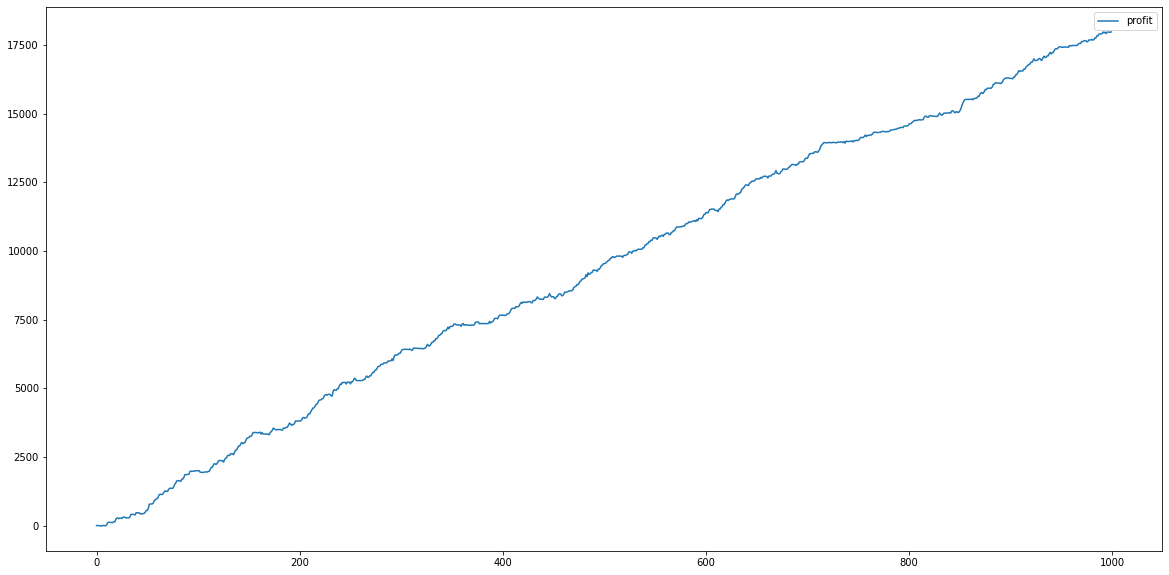

In [228]:
strategy = Cluster_Pair_Stratagy(**params)
bt = Backtest(feeds, strategy) # commision=0,0004
res, trades = bt.run(plot=True)

In [229]:
res, trades

({'total_profit': nan,
  'num_trades': 998,
  'sortino_ratio': nan,
  'return, %': nan},
 [{},
  {},
  {2: -15.496348215712633,
   4: -6.838344556673239,
   11: -12.656946839308873,
   17: -27.127787293885927,
   31: -9.741952087713104,
   41: 33.38761564891041,
   49: 4.777682692169087,
   52: -47.885644991140296,
   53: 12.834998206033532,
   57: -15.532000512297747,
   64: 128.04396359381255,
   68: -42.10282226107429,
   70: 3.1384854695055378,
   75: 22.288903719756874,
   97: -18.606759631089346,
   0: -0.006878134641081327,
   18: 0.00687509781545417,
   26: -1.096119133275826,
   48: -1.4552261137800486,
   62: 4.893325504012528,
   67: -0.6767512434333827,
   79: -1.5333034263903318,
   36: 1043.6689858333405,
   83: -2511.1999517849613,
   86: -2511.1999517849613,
   90: 1427.5279181874446,
   93: 1648.96460153536,
   94: 1847.4651553709452,
   12: 2.185822043473313,
   24: 9.402059365608167,
   29: 15.163793085715692,
   39: 7.121376596946329,
   81: -2.526621401849137,
   9

In [149]:
times_columns = feature_test_columns
cluster_column = 'label'

tickers = good_tickers

In [150]:
feeds = {i: pd.DataFrame({'Close':test_df[times_columns].T[i]}) for i in tickers}
cluster_labels = pd.DataFrame(test_df[cluster_column], columns = [cluster_column])

ticker_list = list(feeds.keys())

In [151]:
params = { 
    'total_invest_val':10000, 
    'cluster_labels': cluster_labels,
    'log_flag' : False
}

100%|█████████████████████████████████████████| 441/441 [01:14<00:00,  5.91it/s]
/Users/kirill/Desktop/статьи/кластеризация криптовалют /core_changed.py:108: RuntimeWarning: invalid value encountered in double_scalars
  sum(self.comission * feeds[s].close[tick] * abs(a) for s, a in strategy_positions[tick].items()) + \
/Users/kirill/Desktop/статьи/кластеризация криптовалют /core_changed.py:133: RuntimeWarning: invalid value encountered in double_scalars
  cur_position = sum(abs(quantity) * cur_feeds[instrument].close[i] for instrument, quantity in strategy_positions[i].items())
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, 

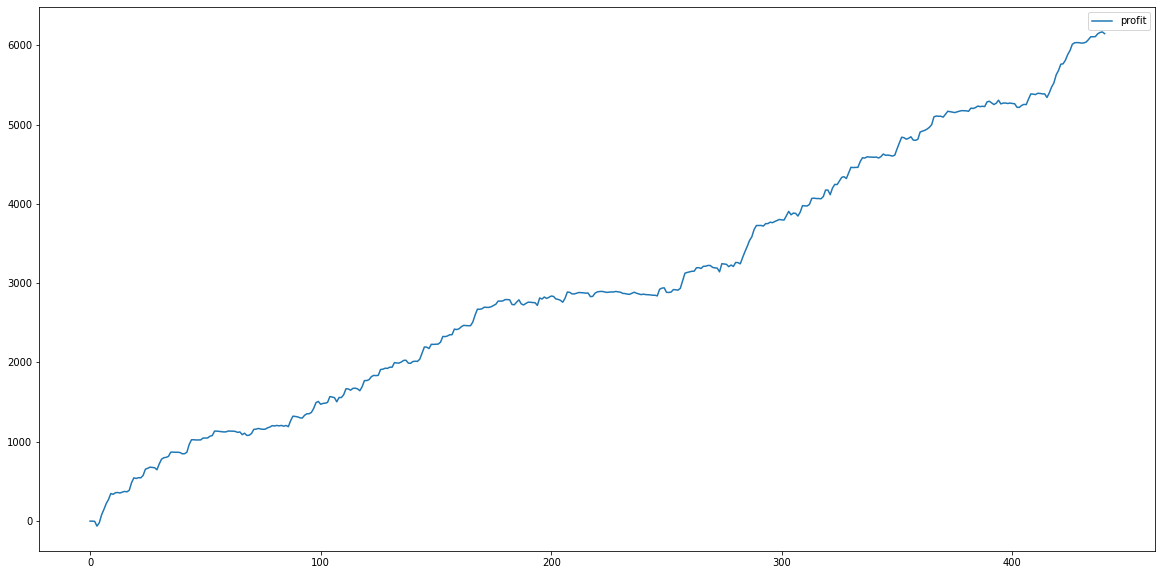

In [166]:
# функцию построения графиков акций отключил (в файле core.py, строка 180) т.к. не понятно, что строить

strategy = Cluster_Pair_Stratagy(**params)
bt = Backtest(feeds, strategy) #, commision=0.0004)
res, trades = bt.run(plot=True)

In [167]:
resb

{'total_profit': nan,
 'num_trades': 440,
 'sortino_ratio': nan,
 'return, %': nan}